# Seattle Airbnb Listing Price Prediction

The motivation of this project is to examine Seattle Airbnb data and answer the following questions:

1. Does location e.g. neighbourhood affect listing price?
2. Does the type of property and room affect listing price?
3. What are the top 5 factors influencing the listing price? To be answered using Random Forests model. 
4. Does season affect listing price? We shall see if there is a seasonal trend. (For future work)

Finally, we will attempt to train a model to predict listing price based on unseen features. 

In [403]:
import numpy as np
import pandas as pd
from re import sub
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('seattle_listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [404]:
df.shape

(3818, 92)

In [405]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [406]:
# To check for data type for each columns
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [407]:
# To check for total number of missing values for each columns
df.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

## Check Listing Price Column

We would be interested to predict the Seattle Airbnb listing price. 

From the columns, we can see that there are 3 columns related to listing price: 'price', 'weekly_price', 'monthly_price'

Let's take a look at the price column only.

In [408]:
# Extract price columns only
df_all_price = df[['price', 'weekly_price', 'monthly_price']]
df_all_price.head()

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


In [409]:
# Check data type for price columns
df_all_price.dtypes

price            object
weekly_price     object
monthly_price    object
dtype: object

In [410]:
# Check for percentage of total missing values for each column
df_all_price.isnull().mean()*100

price             0.000000
weekly_price     47.380828
monthly_price    60.267156
dtype: float64

As can be seen from above, the weekly_price column has 47% missing data and monthly_price has 60% missing data. Since there is a large number of missing data for weekly_price and monthly_price, we will remove these 2 columns and focus on predicting the price (daily price) instead. For future work, it would be interesting to study whether there are certain factors that influenced listings to include weekly_price and monthly_price. 

In [411]:
# Drop column 'weekly_price' and 'monthly_price'
df.drop(columns=['weekly_price', 'monthly_price'], inplace=True)

In [412]:
df.shape

(3818, 90)

### Convert prices from string to float for computation

In [413]:
# Use Lambda functions and reg to convert currency to float
df['price'] = df['price'].apply(lambda x: float(sub(r'[^\d\-.]', '', x)))
df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [414]:
df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Let's plot a histogram to check the price distribution

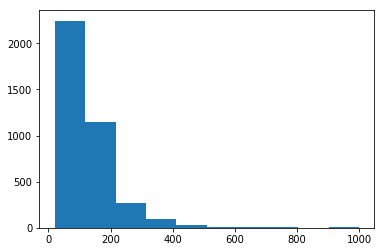

In [415]:
plt.hist(df['price'], bins = 10)
plt.show()

In [416]:
# Checking the amount of skew
df['price'].skew()

3.113122670038106

In [417]:
# Apply log to price to obtain a more normal distribution (reduce skew)
price_log = np.log(df['price'])

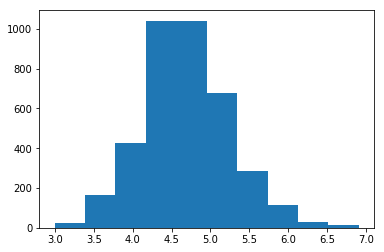

In [418]:
plt.hist(price_log, bins = 10)
plt.show()

In [419]:
price_log.skew()

0.3724138301213262

As can be seen from above, the skew has been reduced after applying log function to the price. 

However, we need to note that after model prediction has been returned, the price_log will need to be converted back to the original price value. 

As can be seen the the histogram plot, the price is skewed.

## Drop columns with 'url' and 'id' in it

There are a lot of columns in the Dataframe. A few of them may not be useful for price prediction such as any url and id. Such columns will be dropped.

In [420]:
# Check for columns containing the word 'url'
col_url = [col for col in df.columns if 'url' in col]
col_url

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [421]:
# Drop all columns containing the word 'url'
df.drop(columns=col_url, inplace=True)

In [422]:
# Check for columns containing the word 'id'
col_id = [col for col in df.columns if 'id' in col]
col_id

['id', 'scrape_id', 'host_id', 'host_identity_verified']

In [423]:
# Drop all columns containing the word 'id'
# 'host_identity_verified' is important so we will keep it
col_id = ['id', 'scrape_id', 'host_id']
df.drop(columns=col_id, inplace=True)
print('Columns dropped')

Columns dropped


## Drop columns with more than 30% NAN

In [424]:
(df.isnull().mean() > 0.3).sum()

4

There's a total of 4 columns with more than 30% missing data. Let's find out which columns are they.

In [425]:
# Calculate the percentage of missing values per column and sort in descending order
df.isnull().mean().sort_values(ascending = False).head(7)

license                  1.000000
square_feet              0.974594
security_deposit         0.511262
notes                    0.420639
neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
dtype: float64

We can see that the columns with more than 30% missing data are 'notes', 'square_feet', 'security_deposit' and 'license'. Let's study further to see whether we can drop these columns.

In [426]:
df_miss_30 = df[['notes', 'square_feet', 'security_deposit', 'license']]
df_miss_30.head()

,notes,square_feet,security_deposit,license
0,NaN,NaN,NaN,NaN
1,What's up with the free pillows? Our home was...,NaN,$100.00,NaN
2,Our house is located just 5 short blocks to To...,NaN,"$1,000.00",NaN
3,NaN,NaN,NaN,NaN
4,Belltown,NaN,$700.00,NaN


In [427]:
df_miss_30.isnull().mean()

notes               0.420639
square_feet         0.974594
security_deposit    0.511262
license             1.000000
dtype: float64

We can see that the 'notes' column mainly consists of long strings of texts. These would not help us in predicting price and therefore will be removed.

The 'square_feet' and 'license' column have 97% and 100% missing data respectively and shall be removed as well.

The 'security_deposit' column has 51% of missing data. They may have a relationship with the listing price. But for this exercise, the column will be dropped as well. This is to avoid having to remove too many rows due to missing data in the 'security_deposit' which will lead to too much information loss.

In [428]:
# Drop columns with more than 30% missing data
df = df.loc[:, df.isnull().mean() < .3]
print('Columns dropped')

Columns dropped


## Remove categorical columns with only 1 variable and more than 20 variables

In [429]:
df.head(3)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15


In [430]:
# Calculate how many different types of variables exists in each categorical columns
col_var_count = []
for x in df.select_dtypes(include=['object']).columns:
    count = len(set(df[x]))
    col_var_count.append(count)
print(sorted(set(col_var_count)))

[1, 2, 3, 5, 7, 17, 29, 34, 45, 46, 82, 87, 103, 116, 119, 121, 322, 985, 1381, 1442, 1467, 2012, 2507, 2575, 3120, 3284, 3479, 3742, 3792]


Columns with only 1 variable will be discarded as it provides no information for predicting price. 

Columns with too many variables (more than 20) will be discarded as well because it will create too many dummy variables.

In [431]:
# Create a loop that returns a list of columns with only 1 and more than 20 different categorical variables. 

col_var = []
for x in df.select_dtypes(include=['object']).columns:
    count = len(set(df[x]))
    if count == 1:
        col_var.append(x)
    elif count > 20:
        col_var.append(x)
print(col_var)

['last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_rate', 'host_neighbourhood', 'host_verifications', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'market', 'country_code', 'country', 'amenities', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names']


In [432]:
df[col_var].head(3)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_name,host_since,host_location,host_about,host_response_rate,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,zipcode,market,country_code,country,amenities,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names
0,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",96%,Queen Anne,"['email', 'phone', 'reviews', 'kba']","Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,98119,Seattle,US,United States,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON
1,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,98%,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...","7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,98119,Seattle,US,United States,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$40.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON
2,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,67%,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']","West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,98119,Seattle,US,United States,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$300.00,$25.00,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON


The following columns seems to have potential in providing information:
- host_response_rate
- extra_people
- cleaning_fee

The above columns shall be converted to numerical values

### Remove the following from col_var and convert them to numerical values
* host_response_rate
* extra_people
* cleaning_fee

In [433]:
col_var.remove('host_response_rate')
col_var.remove('extra_people')
col_var.remove('cleaning_fee')
print(col_var)

['last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'host_name', 'host_since', 'host_location', 'host_about', 'host_neighbourhood', 'host_verifications', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'market', 'country_code', 'country', 'amenities', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names']


In [434]:
# Drop columns with only 1 and more than 20 different categorical variables. 
df = df.drop(col_var, axis = 1)
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'city', 'state', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculate

In [435]:
# Check again for number of categorical variables in each column
col_var = []
for x in df.select_dtypes(include=['object']).columns:
    count = len(set(df[x]))
    col_var.append(count)
print(sorted(set(col_var)))

[2, 3, 5, 7, 17, 45, 46, 119]


Let's go through one column by one column to decide whether the categorical variable is worth keeping or not.

In [436]:
df.select_dtypes(include=['object']).head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,smart_location,is_location_exact,property_type,room_type,bed_type,cleaning_fee,extra_people,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,96%,100%,f,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,NaN,$5.00,f,moderate,f,f
1,within an hour,98%,100%,t,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,$40.00,$0.00,f,strict,t,t
2,within a few hours,67%,100%,f,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,House,Entire home/apt,Real Bed,$300.00,$25.00,f,strict,f,f


In [437]:
df.select_dtypes(include=['object']).isnull().sum()

host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_group_cleansed           0
city                                   0
state                                  0
smart_location                         0
is_location_exact                      0
property_type                          1
room_type                              0
bed_type                               0
cleaning_fee                        1030
extra_people                           0
instant_bookable                       0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

### cleaning_fee

In [438]:
df['cleaning_fee'].head()

0        NaN
1     $40.00
2    $300.00
3        NaN
4    $125.00
Name: cleaning_fee, dtype: object

In [439]:
df['cleaning_fee'].isnull().mean()

0.26977475117862754

For cleaning_fee, missing values shall be set to 0. 

In [440]:
df['cleaning_fee'].fillna('$0.00', inplace = True)

In [441]:
df['cleaning_fee'].head()

0      $0.00
1     $40.00
2    $300.00
3      $0.00
4    $125.00
Name: cleaning_fee, dtype: object

In [442]:
# Use Lambda functions and reg to convert currency to float
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: float(sub(r'[^\d\-.]', '', x)))
df['cleaning_fee'].head()

0      0.0
1     40.0
2    300.0
3      0.0
4    125.0
Name: cleaning_fee, dtype: float64

### extra_people

In [443]:
df['extra_people'].head()

0     $5.00
1     $0.00
2    $25.00
3     $0.00
4    $15.00
Name: extra_people, dtype: object

In [444]:
# Use Lambda functions and reg to convert currency to float
df['extra_people'] = df['extra_people'].apply(lambda x: float(sub(r'[^\d\-.]', '', x)))
df['extra_people'].head()

0     5.0
1     0.0
2    25.0
3     0.0
4    15.0
Name: extra_people, dtype: float64

### host_acceptance_rate

In [445]:
set(df['host_acceptance_rate'])

{'0%', '100%', nan}

In [446]:
df[df['host_acceptance_rate'] == '0%']

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2920,within a day,100%,0%,f,1.0,1.0,t,f,Capitol Hill,Seattle,WA,"Seattle, WA",47.617641,-122.327704,t,Apartment,Shared room,2,1.0,1.0,1.0,Pull-out Sofa,95.0,20.0,1,0.0,3,1125,30,60,90,365,6,100.0,9.0,10.0,10.0,10.0,10.0,9.0,t,moderate,f,f,1,0.51


Seems that there is only one row with host_acceptance_rate at 0%. Might want to check whether it is a typo. Anyway, we will drop host_acceptance_rate column because with only one row of data it will not give us useful information. 

In [447]:
df.drop(columns='host_acceptance_rate', inplace=True)
print('Column dropped')

Column dropped


### host_response_time

In [448]:
df['host_response_time'].head()

0    within a few hours
1        within an hour
2    within a few hours
3                   NaN
4        within an hour
Name: host_response_time, dtype: object

In [449]:
# Check for type of variable in 'host_response_time'
set(df['host_response_time'])

{'a few days or more',
 nan,
 'within a day',
 'within a few hours',
 'within an hour'}

In [450]:
# Return row for 'host_response_time' with NaN
df[df['host_response_time'].isna()].head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Seattle,WA,"Seattle, WA",47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
5,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Seattle,WA,"Seattle, WA",47.630525,-122.366174,t,House,Private room,2,1.0,1.0,1.0,Real Bed,120.0,40.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45
8,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Seattle,WA,"Seattle, WA",47.632410,-122.357216,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,90.0,0.0,1,0.0,3,1125,6,36,66,341,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,f,strict,f,f,1,1.22
18,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Seattle,WA,"Seattle, WA",47.639776,-122.372235,t,Apartment,Private room,2,2.0,1.0,1.0,Futon,200.0,0.0,1,0.0,1,1125,0,0,0,125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
19,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Seattle,WA,"Seattle, WA",47.636025,-122.358694,t,House,Entire home/apt,10,3.5,5.0,5.0,Real Bed,700.0,250.0,1,0.0,3,30,24,54,84,359,5,85.0,10.0,9.0,9.0,9.0,8.0,8.0,f,flexible,f,f,1,0.82


In [451]:
df['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [452]:
df['host_response_time'].isnull().mean()

0.13698271346254584

Since both the host_response_time and host_response_rate have missing values from the same row and made up of only about 14% of the entire dataset rows, we would try to discard the rows with the missing values. 

For future work, the missing values may be addressed by either finding out why it is missing in the first place or assigning a variable to it instead so as to not lose the rows for model training.

In [453]:
df.dropna(subset=['host_response_time'], inplace = True)
print('Rows dropped')

Rows dropped


### host_response_rate

Let's convert host_response_rate percentage string variable to float

In [454]:
# Use Lambda functions and strip function to convert string percentage to float
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: float(x.strip('%')))
df['host_response_rate'].head()

0     96.0
1     98.0
2     67.0
4    100.0
6    100.0
Name: host_response_rate, dtype: float64

### Check for remaining missing values

In [455]:
df.select_dtypes(include=['object']).isnull().sum()

host_response_time                  0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_group_cleansed        0
city                                0
state                               0
smart_location                      0
is_location_exact                   0
property_type                       1
room_type                           0
bed_type                            0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [456]:
df[df['property_type'].isna()].head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2184,within a few hours,88.0,f,4.0,4.0,t,t,Rainier Valley,Seattle,WA,"Seattle, WA",47.529846,-122.27584,t,NaN,Entire home/apt,4,1.0,2.0,2.0,Real Bed,120.0,75.0,2,10.0,2,730,0,4,34,309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f,4,NaN


In [457]:
df.dropna(subset=['property_type'], inplace = True)
print('Row dropped')

Row dropped


In [458]:
df.select_dtypes(include=['object']).head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,smart_location,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,f,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,f,moderate,f,f
1,within an hour,t,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,f,strict,t,t
2,within a few hours,f,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,House,Entire home/apt,Real Bed,f,strict,f,f
4,within an hour,f,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,House,Entire home/apt,Real Bed,f,strict,f,f
6,within an hour,t,t,t,Queen Anne,Seattle,WA,"Seattle, WA",t,House,Private room,Real Bed,f,moderate,f,f


In [459]:
set(df['neighbourhood_group_cleansed'])

{'Ballard',
 'Beacon Hill',
 'Capitol Hill',
 'Cascade',
 'Central Area',
 'Delridge',
 'Downtown',
 'Interbay',
 'Lake City',
 'Magnolia',
 'Northgate',
 'Other neighborhoods',
 'Queen Anne',
 'Rainier Valley',
 'Seward Park',
 'University District',
 'West Seattle'}

In [460]:
set(df['city'])

{'Ballard, Seattle',
 'Phinney Ridge Seattle',
 'Seattle',
 'Seattle ',
 'West Seattle',
 '西雅图'}

In [461]:
set(df['state'])

{'WA'}

In [462]:
set(df['smart_location'])

{'Ballard, Seattle, WA',
 'Phinney Ridge Seattle, WA',
 'Seattle , WA',
 'Seattle, WA',
 'West Seattle, WA',
 '西雅图, WA'}

After looking through columns regarding location, we will only retain 'neighbourhood_group_cleansed' for model training.

In [463]:
df.drop(columns=['city','state','smart_location'], inplace=True)
print('Columns dropped')

Columns dropped


In [464]:
df.select_dtypes(include=['object']).head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,f,t,t,Queen Anne,t,Apartment,Entire home/apt,Real Bed,f,moderate,f,f
1,within an hour,t,t,t,Queen Anne,t,Apartment,Entire home/apt,Real Bed,f,strict,t,t
2,within a few hours,f,t,t,Queen Anne,t,House,Entire home/apt,Real Bed,f,strict,f,f
4,within an hour,f,t,t,Queen Anne,t,House,Entire home/apt,Real Bed,f,strict,f,f
6,within an hour,t,t,t,Queen Anne,t,House,Private room,Real Bed,f,moderate,f,f


### Convert columns with t and f to 1 and 0 respectively

In [465]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,within a few hours,96.0,f,3.0,3.0,t,t,Queen Anne,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,within an hour,98.0,t,6.0,6.0,t,t,Queen Anne,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,within a few hours,67.0,f,2.0,2.0,t,t,Queen Anne,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
4,within an hour,100.0,f,2.0,2.0,t,t,Queen Anne,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
6,within an hour,100.0,t,1.0,1.0,t,t,Queen Anne,47.636605,-122.368519,t,House,Private room,2,1.0,1.0,1.0,Real Bed,80.0,0.0,1,10.0,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.46


In [466]:
# Loop through each column and replace t with 1 and f with 0

for column in df.columns:
    if type(df[column][0]) == str:
        df[column] = df[column].replace({"f": 0, "t": 1})
    else:
        pass

df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,within a few hours,96.0,0,3.0,3.0,1,1,Queen Anne,47.636289,-122.371025,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,2,4.07
1,within an hour,98.0,1,6.0,6.0,1,1,Queen Anne,47.639123,-122.365666,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,6,1.48
2,within a few hours,67.0,0,2.0,2.0,1,1,Queen Anne,47.629724,-122.369483,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,2,1.15
4,within an hour,100.0,0,2.0,2.0,1,1,Queen Anne,47.632918,-122.372471,1,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,strict,0,0,1,0.89
6,within an hour,100.0,1,1.0,1.0,1,1,Queen Anne,47.636605,-122.368519,1,House,Private room,2,1.0,1.0,1.0,Real Bed,80.0,0.0,1,10.0,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,1,2.46


After we have decided the categorical variables to keep, it is time to create dummy variables

## Clean columns based on numerical type

Let's check columns based on numerical data type

In [467]:
df.select_dtypes(include=['number']).head(10)

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,96.0,0,3.0,3.0,1,1,47.636289,-122.371025,1,4,1.0,1.0,1.0,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07
1,98.0,1,6.0,6.0,1,1,47.639123,-122.365666,1,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48
2,67.0,0,2.0,2.0,1,1,47.629724,-122.369483,1,11,4.5,5.0,7.0,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15
4,100.0,0,2.0,2.0,1,1,47.632918,-122.372471,1,6,2.0,3.0,3.0,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,1,0.89
6,100.0,1,1.0,1.0,1,1,47.636605,-122.368519,1,2,1.0,1.0,1.0,80.0,0.0,1,10.0,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,2.46
7,100.0,1,5.0,5.0,1,1,47.640161,-122.375856,1,2,1.0,1.0,1.0,60.0,25.0,1,0.0,2,7,22,42,42,100,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1,1,5,4.73
9,98.0,1,6.0,6.0,1,1,47.637492,-122.366889,1,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,365,6,19,49,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,1,1,6,1.55
10,100.0,1,1.0,1.0,1,1,47.635482,-122.358478,1,2,1.0,1.0,1.0,95.0,15.0,2,15.0,3,7,0,0,0,153,181,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,3.33
11,100.0,0,1.0,1.0,1,1,47.637214,-122.360046,1,2,1.0,1.0,1.0,99.0,150.0,1,0.0,3,1125,21,21,21,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0,0,0,1,0.98
12,100.0,1,1.0,1.0,1,1,47.635546,-122.373171,1,4,1.0,2.0,3.0,245.0,95.0,1,0.0,3,14,30,60,90,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,0.92


Notice that 'host_listings_count' and 'host_total_listings_count' seems identical. Let's confirm on this. 

In [468]:
# Check whether 'host_listings_count' and 'host_total_listings_count' are identical. If yes, drop 'host_listings_count'.
print(df['host_listings_count'].equals(df['host_total_listings_count']))

True


In [469]:
# Drop 'host_listings_count' column
df.drop(columns=['host_listings_count'], inplace=True)
print('Column dropped')

Column dropped


We will drop latitude and longitude as well because they most likely doesn't offer useful data. We will work with neighbourhood data instead for location study. 

In [470]:
df.drop(columns=['latitude','longitude'], inplace=True)
print('Column dropped')

Column dropped


In [471]:
df.select_dtypes(include=['number']).head(3)

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,96.0,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07
1,98.0,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48
2,67.0,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15


In [472]:
# Check for remaining columns with missing values
df.isnull().sum()

host_response_time                    0
host_response_rate                    0
host_is_superhost                     0
host_total_listings_count             0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_group_cleansed          0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            14
bedrooms                              6
beds                                  1
bed_type                              0
price                                 0
cleaning_fee                          0
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0


In [473]:
# Drop all rows with missing values
df_drop_nan = df.dropna()
df_drop_nan.shape

(2834, 39)

### Create dummy variables of categorical variables

In [474]:
# Function to create dummy variables for categorical columns

def create_dummy_df(df, cat_cols, dummy_na):

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, 
                                                                 dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [475]:
# Obtain columns containing categorical variables

cat_cols = df.select_dtypes(include=['object']).columns

In [476]:
# Create dummy variables for categorical variables in dataframe

df_new = create_dummy_df(df_drop_nan, cat_cols, dummy_na=False)
df_new.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,98.0,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67.0,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,100.0,0,2.0,1,1,1,6,2.0,3.0,3.0,450.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,1,0.89,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,100.0,1,1.0,1,1,1,2,1.0,1.0,1.0,80.0,0.0,1,10.0,3,14,20,49,71,346,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,2.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0


# Answers to Questions

Now that we have cleaned up the dataset, we shall attempt to answer the following questions:

1. Does location e.g. neighbourhood affect listing price?
2. Does the type of property and room affect listing price?
3. What are the top 5 factors influencing the listing price? To be answered using Random Forests model. 

### 1. Does location e.g. neighbourhood affect listing price?

We can group the neighbourhood column and calculate the mean price of each neighbourhood for comparison

In [477]:
# Extract 'neighbourhood_group_cleansed' and 'price' column for assessment
df_loc = df[['neighbourhood_group_cleansed', 'price']]

In [478]:
# Group by neighbourhood_group_cleansed column and calculate the mean price for each neighbourhood
# Then sort based on price in ascending order
df_loc_group = df_loc.groupby(by=['neighbourhood_group_cleansed']).mean().sort_values(by=['price'])
df_loc_group.columns = ['price_mean']
df_loc_group

,price_mean
neighbourhood_group_cleansed,
Delridge,79.092308
Northgate,86.057143
Lake City,88.884615
Rainier Valley,89.525180
Beacon Hill,91.600000
University District,93.317757
Interbay,95.700000
Seward Park,101.974359
Other neighborhoods,114.469118


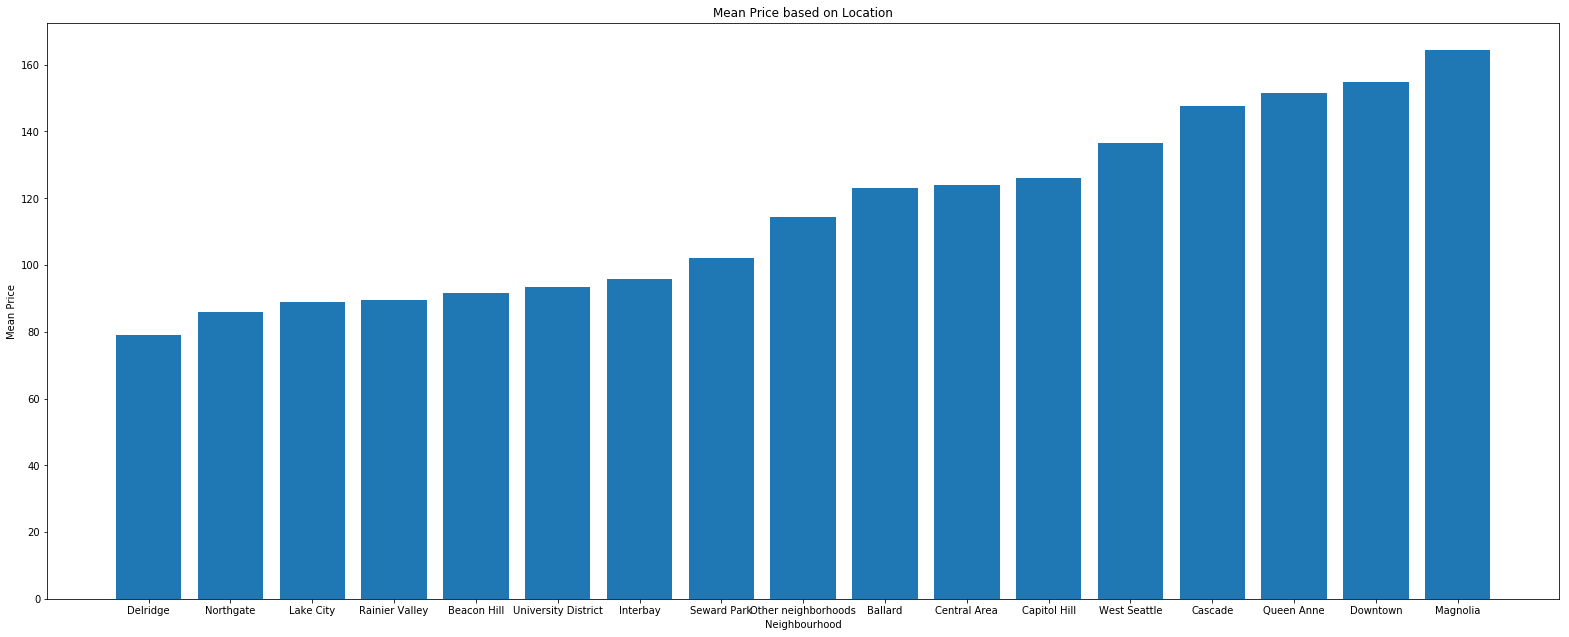

In [479]:
# Plot the mean price based on location bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,3.5,2])
location = df_loc_group_sort.index
price = df_loc_group['price_mean']
ax.bar(location,price)
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price based on Location')
plt.show()

From the bar chart above, we can see that there are quite a huge price variation based on location. We can see that the northern part of Seattle near the bay such as Magnolia, Queen Anne and Downtown are able to command a higher listing price compared to other locations.

In conclusion, location does play an important role in the Airbnb listing price. 

In [480]:
# Add additional price info
df_loc_group['price_min'] = df_loc.groupby(by=['neighbourhood_group_cleansed']).min()
df_loc_group['price_max'] = df_loc.groupby(by=['neighbourhood_group_cleansed']).max()
df_loc_group['price_count'] = df_loc.groupby(by=['neighbourhood_group_cleansed']).count()
df_loc_group

,price_mean,price_min,price_max,price_count
neighbourhood_group_cleansed,,,,
Delridge,79.092308,35.0,250.0,65
Northgate,86.057143,30.0,200.0,70
Lake City,88.884615,35.0,252.0,52
Rainier Valley,89.525180,25.0,300.0,139
Beacon Hill,91.600000,30.0,399.0,105
University District,93.317757,28.0,350.0,107
Interbay,95.700000,50.0,150.0,10
Seward Park,101.974359,34.0,375.0,39
Other neighborhoods,114.469118,25.0,575.0,680


### 2. Does the type of property and room affect listing price?

Let's use the same method as we did in the neighbourhood example. We will group the type of property and room, then we calculate the mean price for each property and room. 

For property column

In [481]:
# Extract 'property_type' and 'price' column for assessment
df_prop = df[['property_type', 'price']]

In [482]:
# Group by property_type and calculate the mean price for each property type
# Then sort based on price in ascending order
df_prop_group = df_prop.groupby(by=['property_type']).mean().sort_values(by=['price'])
df_prop_group.columns = ['price_mean']
df_prop_group

,price_mean
property_type,
Tent,25.000000
Dorm,39.500000
Treehouse,48.000000
Other,93.238095
Chalet,98.500000
Yurt,100.000000
Bed & Breakfast,101.133333
Cabin,103.650000
Camper/RV,108.100000


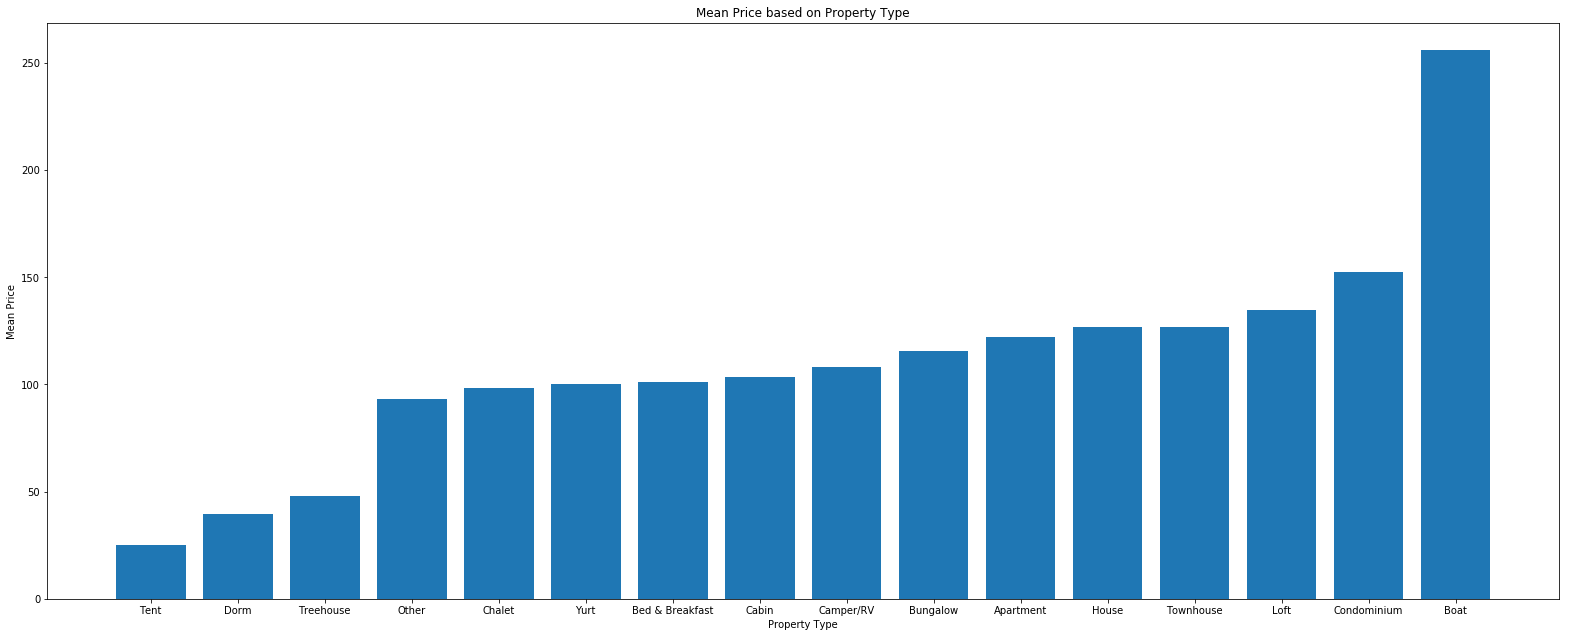

In [483]:
# Plot the mean price based on property type bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,3.5,2])
property_type = df_prop_group.index
price = df_prop_group['price_mean']
ax.bar(property_type,price)
ax.set_xlabel('Property Type')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price based on Property Type')
plt.show()

From the bar chart above, we can see that tent, dorm and treehouse have the lowest listing price at around average of $25 to $50. Boat has the highest listing price with an average of $250. For other property type, the listing price ranges between an average of $100 to $150 with loft and condominium property being at the higher end of the listing price. We can see from here that the kind of property that affect listing price the most are the unique kind of property such as tent, dorm, treehouse and boat. 

For room column

In [484]:
# Extract 'room_type' and 'price' column for assessment
df_room = df[['room_type', 'price']]

In [485]:
# Group by room_type and calculate the mean price for each room type
# Then sort based on price in ascending order
df_room_group = df_room.groupby(by=['room_type']).mean().sort_values(by=['price'])
df_room_group.columns = ['price_mean']
df_room_group

,price_mean
room_type,
Shared room,45.177570
Private room,71.375127
Entire home/apt,152.152765


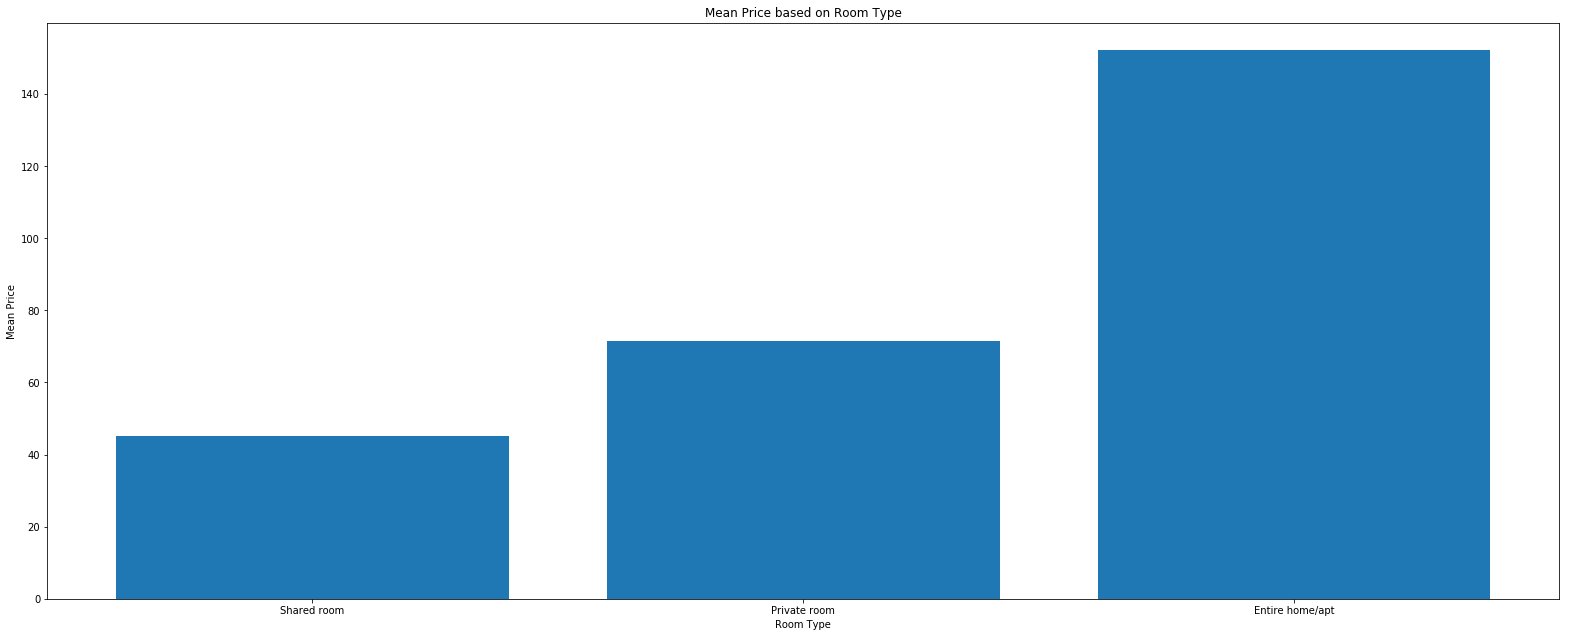

In [486]:
# Plot the mean price based on room type bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,3.5,2])
room_type = df_room_group.index
price = df_room_group['price_mean']
ax.bar(room_type,price)
ax.set_xlabel('Room Type')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price based on Room Type')
plt.show()

From the bar chart above, we can see that there's a significant average listing price difference in terms of the type of room being offered. The difference in listing price does make sense because when you're sharing a room, the price is typically cheaper. The listing price is much higher for entire home / apartment because you are getting more space and rooms for it. 

### 3. What are the top 5 factors influencing the listing price? To be answered using Random Forests model.

In [487]:
# Import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [488]:
# Reset df to cleaned dataframe
df = df_new.copy()

In [489]:
# Create X and y dataset from df
y = df['price']
X = df.drop(['price'], axis = 1)

In [490]:
# Split the X and y into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [491]:
# Create Regressor
# Fit the Regressor
# Predict the listing price based on X test set
# Print the R squared score to determine the performance of the Regressor
# Compare the difference between the real listing price and predicted listing price
clf=RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("r2 score:",r2_score(y_test, y_pred))

r2 score: 0.6137371911245553


We got a r2 score of 61%. Although the results are not fantastic, I would say we are going in the right direction. Let's take a look at the real price vs the predicted price for comparison.

In [492]:
pred_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_compare.head(20)

,Real Values,Predicted Values
2771,47.0,68.860000
3784,110.0,100.490000
1515,89.0,123.060000
1469,219.0,162.380000
261,150.0,114.150000
2429,37.0,55.430000
413,140.0,112.040000
2145,84.0,91.670000
3014,150.0,150.010000
3306,119.0,140.770000


In [493]:
# Link feature importances to column name
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending = False).head(10)

bedrooms                                 0.357867
bathrooms                                0.102813
cleaning_fee                             0.086216
accommodates                             0.059503
room_type_Private room                   0.047397
extra_people                             0.033025
neighbourhood_group_cleansed_Downtown    0.025142
reviews_per_month                        0.024991
room_type_Shared room                    0.019392
number_of_reviews                        0.018443
dtype: float64

Based on the feature importances returned by the Random Forest model, we can see that the top 5 features affecting price mainly are:

1. Number of bedrooms
2. Number of bathrooms
3. Cleaning fee
4. How many people the place can accommodate
5. Whether the room type is 'Private Room'

It does make sense that the more bedrooms and bathrooms offered, the higher the listing price will be. 

### Try out with Linear Regression for comparison

In [494]:
from sklearn.linear_model import LinearRegression

In [495]:
reg = LinearRegression().fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
print("r2 score:",r2_score(y_test, y_pred_reg))

r2 score: 0.5771468771348189


In [496]:
pred_compare_reg = pd.DataFrame({'Real Values':y_test, 'Predicted Values Random Forest':y_pred, 'Predicted Values Linear Regression':y_pred_reg})
pred_compare_reg.head(20)

,Real Values,Predicted Values Random Forest,Predicted Values Linear Regression
2771,47.0,68.860000,59.304828
3784,110.0,100.490000,93.651158
1515,89.0,123.060000,145.836660
1469,219.0,162.380000,155.794761
261,150.0,114.150000,134.554741
2429,37.0,55.430000,24.320218
413,140.0,112.040000,91.704365
2145,84.0,91.670000,75.716626
3014,150.0,150.010000,144.330193
3306,119.0,140.770000,154.382809


In [497]:
# Link feature importances to column name
importances_reg = reg.coef_
forest_importances = pd.Series(importances_reg, index=X.columns)
forest_importances.sort_values(ascending = False).head(10)

property_type_Boat                         408.595831
neighbourhood_group_cleansed_Downtown       38.524213
property_type_Loft                          35.383463
neighbourhood_group_cleansed_Queen Anne     29.413954
neighbourhood_group_cleansed_Magnolia       28.993235
neighbourhood_group_cleansed_Cascade        27.319860
bathrooms                                   26.046283
bedrooms                                    25.974705
property_type_Tent                          23.454742
property_type_Yurt                          20.782979
dtype: float64

Interestingly, for Linear Regression model, the important features affecting listing price are mainly based on property type and location (neighbourhood). We can also see that the number of bedrooms and bathrooms still play an important room in price listing. 

### Next step

There are a few steps that may help to improve the predictive capability of the Random Forest model:
1. Most of the data are extremely skewed. Applying log function to skewed data can help create a more normal distribution. Although random forest model is regarded as being resilient against skewed data, it is worth still worth exploring the effects of skewed data. 
2. Presence of outliers may affect the performance of the predictive model. Removing outliers may improve the performance of the predictive model. 
3. Multi-collinearity issues due to highly-correlated variables may lead to incorrect conclusion that one variable is a strong predictor compared to another predictor, while in reality both are strong predictors. 